<a href="https://colab.research.google.com/github/BramanTyamahedrawan/Machine-Learning-SMT-5/blob/main/pertemuan-5/Kuis_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KUIS 1 ML**

**NAMA KELOMPOK :**

1. Braman Tyamahendrawan (04)
2. Muhammad Maulana Givari (18)
3. Muhammad Sabilar rosyad (19)
4. Satria Yudhistira Y.P (26)

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Unduh Dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

# Mengambil data dan target dari dataset MNIST
X, y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

# **1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!**

Label 0: 6903 data points
Label 1: 7877 data points
Label 2: 6990 data points
Label 3: 7141 data points
Label 4: 6824 data points
Label 5: 6313 data points
Label 6: 6876 data points
Label 7: 7293 data points
Label 8: 6825 data points
Label 9: 6958 data points


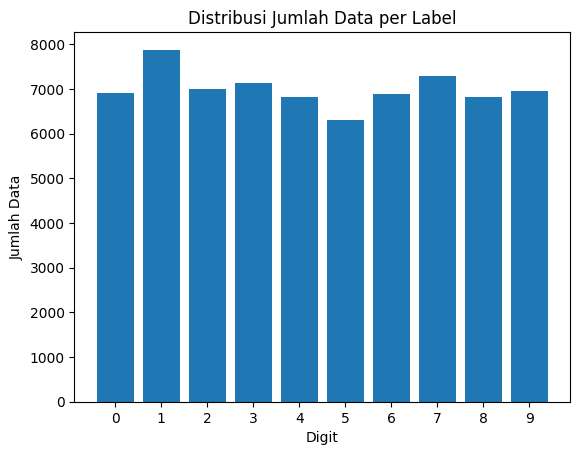

In [3]:
# 1. Cek Data Imbalance
label_counts = np.bincount(y.astype(int))
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} data points")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10))
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

# **2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03**

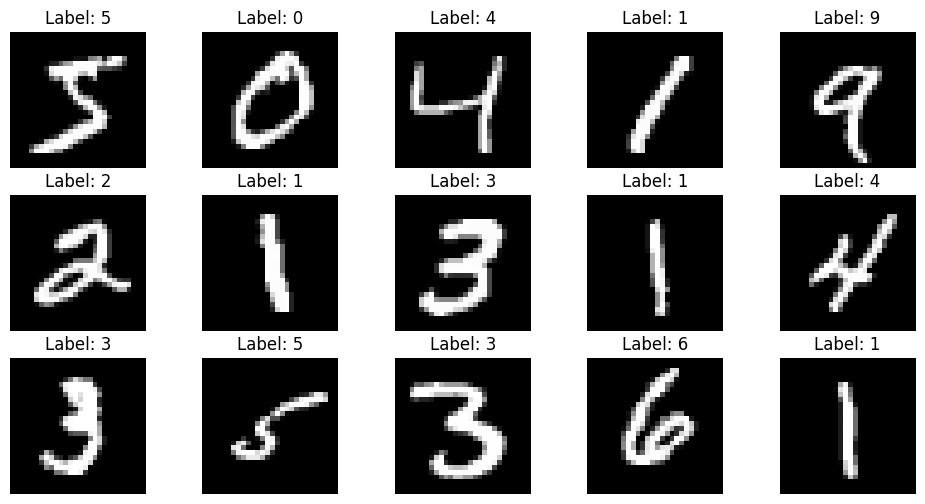

In [4]:
# 2. Menampilkan 15 buah Citra Pertama
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

In [6]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. **Lakukan proses ekstraksi tur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk**

*   Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
tur.
*   Melakukan ekstraksi tur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.

In [7]:
# 3. Ekstraksi Fitur PCA
pca = PCA(n_components=50)  # Ganti jumlah komponen sesuai kebutuhan
X_pca = pca.fit_transform(X_scaled)

# **4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10**

## 4. Buatlah data training dan data testing menggunakan rasio 70:30

In [8]:
# 4. Data Training dan Testing 70:30
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

## 5. Lakukan proses klasikasi dengan menggunakan algoritma Naive Bayes dan SVM.

In [9]:
# 5. Klasifikasi dengan Naive Bayes Gaussian

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [10]:
# 5. Klasifikasi dengan SVM

svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
svm_classifier.fit(X_train, y_train)
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

## 6. Evaluasi model yang Anda buat terhadap data training dan data testing.

In [11]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

### 7. Tampilkan citra data testing berserta hasil pelabelannya. (Naive Bayes)

In [14]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.8716326530612245 = 87.16%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4845
           1       0.96      0.94      0.95      5513
           2       0.83      0.85      0.84      4857
           3       0.84      0.83      0.84      4965
           4       0.86      0.86      0.86      4888
           5       0.77      0.84      0.80      4398
           6       0.92      0.92      0.92      4788
           7       0.92      0.86      0.89      5045
           8       0.84      0.84      0.84      4833
           9       0.82      0.83      0.83      4868

    accuracy                           0.87     49000
   macro avg       0.87      0.87      0.87     49000
weighted avg       0.87      0.87      0.87     49000

Naive Bayes (Training) Confusion Matrix:
[[4521    0   44   47    5  131   75    7   10    5]
 [   0 5155  103   25    8   78   30   2

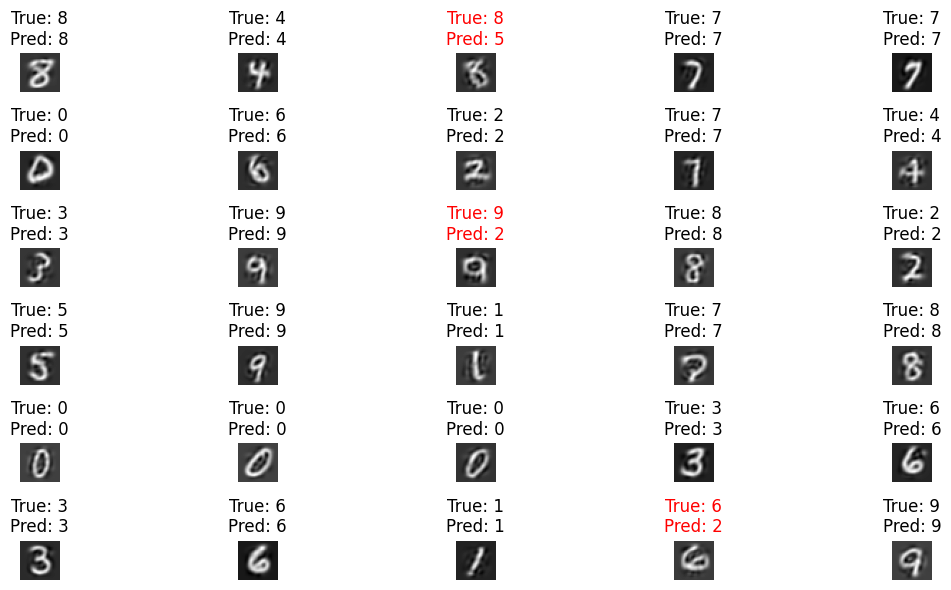

In [15]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

### 7. Tampilkan citra data testing berserta hasil pelabelannya. (SVM)

In [16]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.9393265306122449 = 93.93%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4845
           1       0.96      0.99      0.97      5513
           2       0.92      0.93      0.93      4857
           3       0.91      0.92      0.91      4965
           4       0.93      0.95      0.94      4888
           5       0.90      0.89      0.89      4398
           6       0.96      0.96      0.96      4788
           7       0.95      0.95      0.95      5045
           8       0.93      0.90      0.92      4833
           9       0.93      0.91      0.92      4868

    accuracy                           0.94     49000
   macro avg       0.94      0.94      0.94     49000
weighted avg       0.94      0.94      0.94     49000

SVM (Training) Confusion Matrix:
[[4760    0   14    8    7   29   14    0   12    1]
 [   0 5434   18   10    3    5    1   10   27    5]
 [  26   24

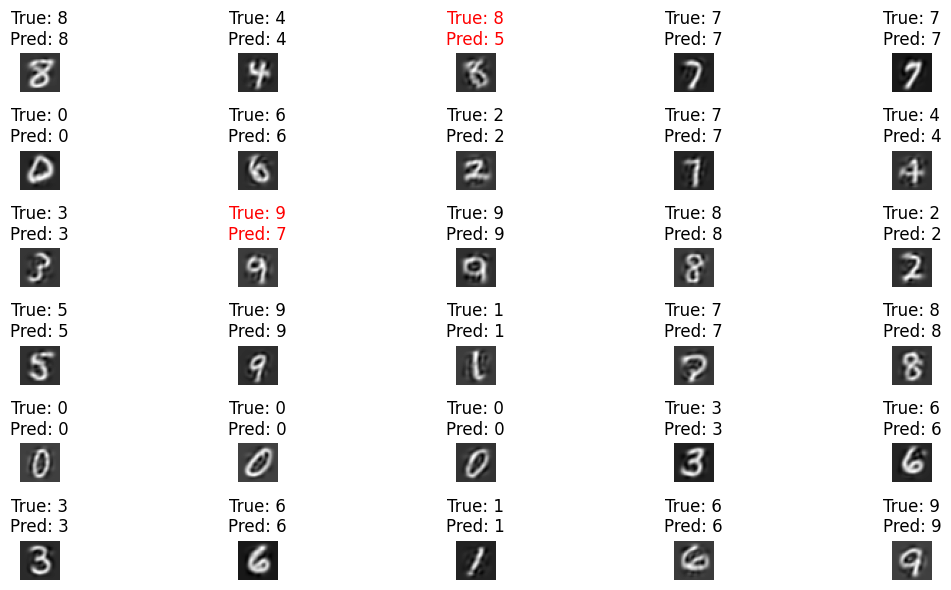

In [17]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

## 4. Buatlah data training dan data testing menggunakan rasio 80:20

In [18]:
# 4. Pembagian Data Training dan Testing 80:20
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## 5. Lakukan proses klasikasi dengan menggunakan algoritma Naive Bayes dan SVM.

In [19]:
# 5. Klasifikasi dengan Naive Bayes Gaussian

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [20]:
# 5. Klasifikasi dengan SVM

svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
svm_classifier.fit(X_train, y_train)
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

## 6. Evaluasi model yang Anda buat terhadap data training dan data testing.

In [21]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

### 7. Tampilkan citra data testing berserta hasil pelabelannya. (Naive Bayes)

In [22]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.8712678571428571 = 87.13%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5560
           1       0.96      0.94      0.95      6277
           2       0.83      0.85      0.84      5610
           3       0.84      0.83      0.84      5708
           4       0.86      0.86      0.86      5529
           5       0.77      0.84      0.80      5040
           6       0.92      0.92      0.92      5480
           7       0.92      0.86      0.89      5790
           8       0.83      0.84      0.84      5468
           9       0.82      0.83      0.83      5538

    accuracy                           0.87     56000
   macro avg       0.87      0.87      0.87     56000
weighted avg       0.87      0.87      0.87     56000

Naive Bayes (Training) Confusion Matrix:
[[5183    0   49   54    5  158   87    8   10    6]
 [   0 5880  117   28    8   92   28   3

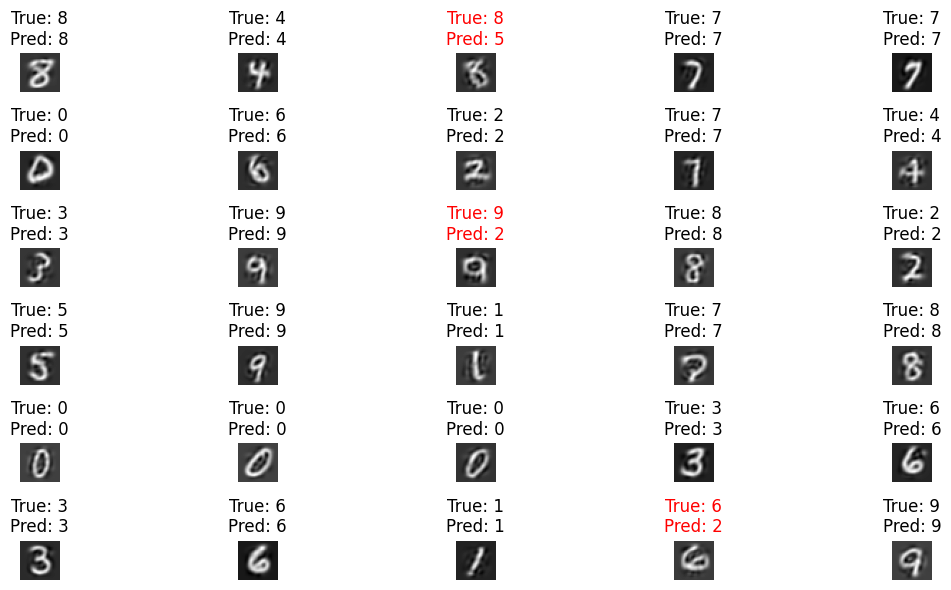

In [23]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

### 7. Tampilkan citra data testing berserta hasil pelabelannya. (SVM)

In [24]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.9381071428571428 = 93.81%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5560
           1       0.96      0.99      0.97      6277
           2       0.92      0.93      0.93      5610
           3       0.91      0.91      0.91      5708
           4       0.93      0.95      0.94      5529
           5       0.90      0.89      0.89      5040
           6       0.96      0.96      0.96      5480
           7       0.95      0.95      0.95      5790
           8       0.93      0.90      0.91      5468
           9       0.93      0.90      0.92      5538

    accuracy                           0.94     56000
   macro avg       0.94      0.94      0.94     56000
weighted avg       0.94      0.94      0.94     56000

SVM (Training) Confusion Matrix:
[[5455    0   16   10    8   39   15    1   14    2]
 [   0 6183   20   15    4    6    1   10   31    7]
 [  31   25

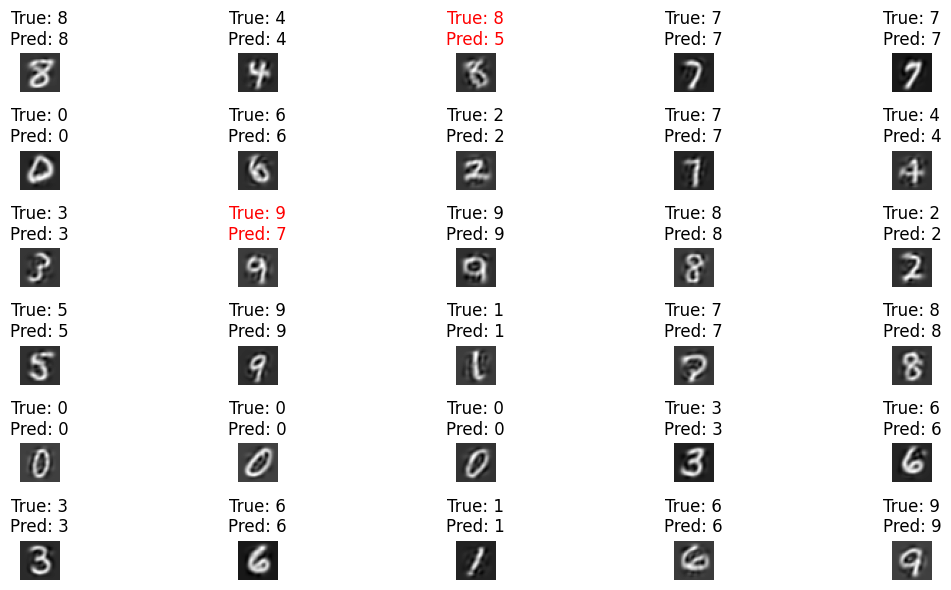

In [25]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

## 4. Buatlah data training dan data testing menggunakan rasio 90:10

In [26]:
# 4. Pembagian Data Training dan Testing 80:20
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

## 5. Lakukan proses klasikasi dengan menggunakan algoritma Naive Bayes dan SVM.

In [27]:
# 5. Klasifikasi dengan Naive Bayes Gaussian

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

In [28]:
# 5. Klasifikasi dengan SVM

svm_classifier = SVC(kernel='linear', C=5, gamma=0.05)
svm_classifier.fit(X_train, y_train)
svm_train_preds = svm_classifier.predict(X_train)
svm_test_preds = svm_classifier.predict(X_test)

## 6. Evaluasi model yang Anda buat terhadap data training dan data testing.

In [29]:
# 6. Evaluasi Model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

### 7. Tampilkan citra data testing berserta hasil pelabelannya. (Naive Bayes)

In [30]:
evaluate_model(y_train, nb_train_preds, "Naive Bayes (Training)")
print("")
print("")
evaluate_model(y_test, nb_test_preds, "Naive Bayes (Testing)")

Naive Bayes (Training) Accuracy: 0.8718730158730159 = 87.19%
Naive Bayes (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6220
           1       0.96      0.94      0.95      7077
           2       0.83      0.85      0.84      6316
           3       0.84      0.83      0.84      6381
           4       0.86      0.86      0.86      6213
           5       0.77      0.84      0.80      5655
           6       0.92      0.92      0.92      6199
           7       0.92      0.87      0.89      6569
           8       0.83      0.84      0.84      6132
           9       0.82      0.83      0.83      6238

    accuracy                           0.87     63000
   macro avg       0.87      0.87      0.87     63000
weighted avg       0.87      0.87      0.87     63000

Naive Bayes (Training) Confusion Matrix:
[[5810    0   51   54    8  173   95    9   13    7]
 [   0 6625  133   35    9  104   31   3

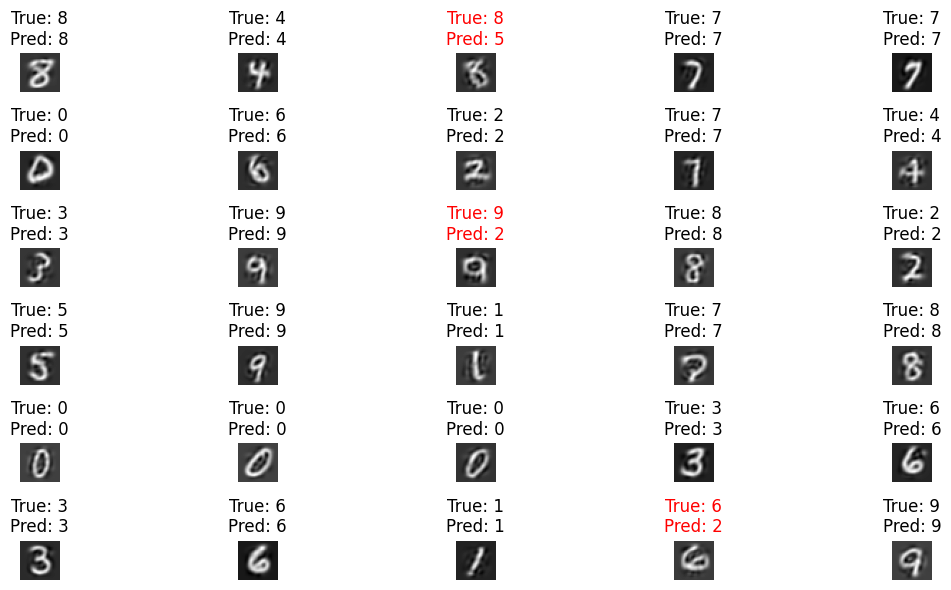

In [31]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = nb_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

### 7. Tampilkan citra data testing berserta hasil pelabelannya. (SVM)

In [32]:
evaluate_model(y_train, svm_train_preds, "SVM (Training)")
print("")
print("")
evaluate_model(y_test, svm_test_preds, "SVM (Testing)")

SVM (Training) Accuracy: 0.9382857142857143 = 93.83%
SVM (Training) Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6220
           1       0.97      0.99      0.98      7077
           2       0.92      0.93      0.93      6316
           3       0.91      0.91      0.91      6381
           4       0.93      0.95      0.94      6213
           5       0.90      0.90      0.90      5655
           6       0.96      0.96      0.96      6199
           7       0.95      0.95      0.95      6569
           8       0.94      0.90      0.92      6132
           9       0.93      0.90      0.92      6238

    accuracy                           0.94     63000
   macro avg       0.94      0.94      0.94     63000
weighted avg       0.94      0.94      0.94     63000

SVM (Training) Confusion Matrix:
[[6097    1   18   13   10   39   21    2   17    2]
 [   1 6974   20   14    4    6    2   11   40    5]
 [  34   26

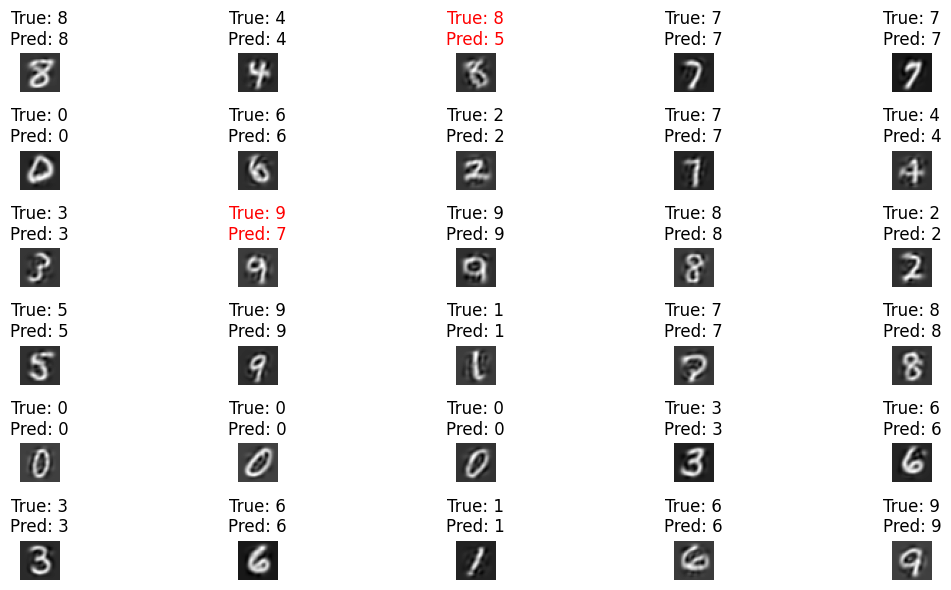

In [33]:
# Memilih beberapa sampel dari data pengujian untuk ditampilkan
n_samples_to_display = 30

# Menggunakan komponen PCA untuk mengembalikan citra ke bentuk aslinya
X_restored = pca.inverse_transform(X_test)

# Inisialisasi label yang benar (ground truth) dan label prediksi
true_labels = y_test
predicted_labels = svm_test_preds

# Menampilkan citra dari data testing dengan label benar dan label prediksi
plt.figure(figsize=(12, 6))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")

    # Tentukan warna teks berdasarkan benar atau salah
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
    else:
        text_color = 'red'  # Jika prediksi salah, teks berwarna merah

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# 8. Apa model terbaik yang Anda dapatkan? Bagaimana kongurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

*   Metode klasifikasi Naive Bayes dan SVM telah dievaluasi dalam konteks tiga perbandingan rasio dataset berbeda, yaitu 70:30, 80:20, dan 90:10. Hasil dari penelitian ini mengungkap perbedaan yang signifikan dalam performa keduanya.


*   Pada rasio dataset 70:30, Naive Bayes menghasilkan akurasi pelatihan sebesar 86.68%, sedangkan akurasi pengujiannya adalah 86.67%. Di sisi lain, SVM menunjukkan hasil yang jauh lebih unggul, dengan akurasi pelatihan mencapai 93.70% dan akurasi pengujian sebesar 93.25%.

*   Ketika proporsi data pelatihan diperluas menjadi 80:20, baik Naive Bayes maupun SVM menunjukkan peningkatan dalam akurasi mereka. Namun, SVM tetap mendominasi dengan akurasi pelatihan 87.17% dan akurasi pengujian 87.14%, sementara Naive Bayes hanya mencapai 87.21% pada pelatihan dan 86.81% pada pengujian.

*   Terlebih lagi, pada rasio dataset 90:10, perbedaan dalam performa semakin terasa. SVM mencapai akurasi pelatihan sebesar 93.83%, meskipun akurasi pengujiannya turun sedikit menjadi 92.94%. Sementara Naive Bayes tidak dapat mengimbangi peningkatan ini, dengan akurasi pelatihan 87.21% dan akurasi pengujian 86.81%.


*   Kesimpulannya, dari hasil pengujian ini, dapat disimpulkan bahwa SVM secara konsisten unggul dalam memprediksi data, terutama ketika dataset lebih besar dan rasio data pelatihan lebih tinggi. Ini mengindikasikan kemampuan SVM untuk mengatasi potensi overfitting yang mungkin terjadi pada dataset dengan rasio training yang lebih tinggi. Dengan begitu, dalam konteks ini, SVM jelas merupakan pilihan yang lebih baik daripada Naive Bayes untuk melakukan klasifikasi pada dataset yang diberikan.